# Temperature Latitudinal Advection

Compare temperature anomalies to the distance traveled north/south. Run on local machine.


LJK

Date created: 04/08/25

Last edited: 09/12/25 (added v2 data)

In [1]:
import csv
from collections import OrderedDict
import numpy as np
import pandas as pd
import scipy.stats as spy
import matplotlib.pyplot as plt
from scipy.stats import linregress

from config import * # directory file paths

In [2]:
fontsize = 18

plt.rc('font', size=fontsize)          # controls default text sizes
plt.rc('axes', titlesize=fontsize)     # fontsize of the axes title
plt.rc('axes', labelsize=fontsize)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=fontsize)    # fontsize of the tick labels
plt.rc('ytick', labelsize=fontsize)    # fontsize of the tick labels
plt.rc('legend', fontsize=fontsize)    # legend fontsize
plt.rc('figure', titlesize=fontsize)  # fontsize of the figure title

In [3]:
metadata_df = pd.read_csv(data_dir + 'AVISO_metadata_w_sst_sss.csv',index_col=0)
metadata_df

,date,time_UTC,latitude,longitude,in_anti,near_anti,in_cyc,near_cyc,datetime,sst,sss,sst_lat_rolling_mean,sss_lat_rolling_mean,sst_lat_norm_anom,sss_lat_norm_anom,time_since_sunrise,time_to_sunrise,sst_spatiotemp_anom,sss_spatiotemp_anom
sample_id,,,,,,,,,,,,,,,,,,,
16,20211120,10:54,29.0000,236.5574,0,0,0,0,2021-11-20 10:54:00,19.1423,33.43918,19.345260,33.432140,-0.010491,0.000364,20.230000,3.770000,-0.206788,-0.000536
17,20211120,12:44,28.7390,236.1088,0,0,0,0,2021-11-20 12:44:00,19.2971,33.40347,19.438067,33.457758,-0.007252,-0.002793,22.033333,1.966667,-0.135661,-0.108369
18,20211120,14:43,28.5030,235.7140,0,0,0,0,2021-11-20 14:43:00,19.4431,33.41065,19.508000,33.470873,-0.003327,-0.003087,0.006667,0.006667,-0.061568,-0.126483
19,20211121,02:03,28.2847,235.3517,0,0,0,0,2021-11-21 02:03:00,19.4344,33.45931,19.592775,33.486874,-0.008083,-0.001407,11.300000,11.300000,-0.054531,-0.119264
20,20211121,04:04,28.0397,234.9534,0,0,0,849094,2021-11-21 04:04:00,19.4094,33.44809,19.659956,33.527669,-0.012744,-0.004048,13.306667,10.693333,-0.253461,-0.134921
21,20211121,06:05,27.8012,234.5413,0,0,849094,0,2021-11-21 06:05:00,19.9021,33.58585,19.785144,33.560310,0.005911,0.001291,15.303333,8.696667,-0.039385,-0.016286
22,20211121,08:00,27.5684,234.1578,0,0,0,849094,2021-11-21 08:00:00,19.9276,33.54956,19.905822,33.609333,0.001094,-0.003003,17.200000,6.800000,-0.062731,-0.073752
23,20211121,09:53,27.3373,233.7767,0,0,0,0,2021-11-21 09:53:00,20.1862,33.59888,20.010833,33.645628,0.008764,-0.002336,19.063333,4.936667,0.105779,-0.055499
24,20211121,11:53,27.0992,233.3740,0,0,0,0,2021-11-21 11:53:00,20.1974,33.85403,20.105778,33.675971,0.004557,0.008856,21.043333,2.956667,0.093421,0.244559


In [4]:
print(min(metadata_df['sst']))
print(max(metadata_df['sst']))

19.1423
25.7251


In [6]:
dist_dir = data_dir + 'CMEMS_traj_dists_travelled_north/'
CMEMS_day30_dists_north = np.load(dist_dir + 'cmems_day30_dists_north_v2.npy',allow_pickle=True)
CMEMS_day60_dists_north = np.load(dist_dir + 'cmems_day60_dists_north_v2.npy',allow_pickle=True)
CMEMS_day90_dists_north = np.load(dist_dir + 'cmems_day90_dists_north_v2.npy',allow_pickle=True)
CMEMS_day120_dists_north = np.load(dist_dir + 'cmems_day120_dists_north_v2.npy',allow_pickle=True)
CMEMS_day150_dists_north = np.load(dist_dir + 'cmems_day150_dists_north_v2.npy',allow_pickle=True)
CMEMS_day180_dists_north = np.load(dist_dir + 'cmems_day180_dists_north_v2.npy',allow_pickle=True)
cmems_dists_north = {30:CMEMS_day30_dists_north,60:CMEMS_day60_dists_north,90:CMEMS_day90_dists_north,
                    120:CMEMS_day120_dists_north,150:CMEMS_day150_dists_north,180:CMEMS_day180_dists_north}

dist_dir =  data_dir + 'OSCAR_traj_dists_travelled_north/'
OSCAR_day30_dists_north = np.load(dist_dir + 'oscar_day30_dists_north_v2.npy',allow_pickle=True)
OSCAR_day60_dists_north = np.load(dist_dir + 'oscar_day60_dists_north_v2.npy',allow_pickle=True)
OSCAR_day90_dists_north = np.load(dist_dir + 'oscar_day90_dists_north_v2.npy',allow_pickle=True)
OSCAR_day120_dists_north = np.load(dist_dir + 'oscar_day120_dists_north_v2.npy',allow_pickle=True)
OSCAR_day150_dists_north = np.load(dist_dir + 'oscar_day150_dists_north_v2.npy',allow_pickle=True)
OSCAR_day180_dists_north = np.load(dist_dir + 'oscar_day180_dists_north_v2.npy',allow_pickle=True)
oscar_dists_north = {30:OSCAR_day30_dists_north,60:OSCAR_day60_dists_north,90:OSCAR_day90_dists_north,
                    120:OSCAR_day120_dists_north,150:OSCAR_day150_dists_north,180:OSCAR_day180_dists_north}

In [7]:
print(np.shape(cmems_dists_north[30]))
print(np.shape(cmems_dists_north[180]))

(53, 1000)
(53, 1000)


In [8]:
def env_linear_window_search(moving_avg):
    """
    moving_avg: latitudinal rolling mean
    """

    r2_threshold = 0.95  # criteria for linearity
    min_window_size = 20  # minimum window size (number of points required to belong to the linear stretch)

    # Iterate over starting points
    max_windows = []
    for i in range(len(moving_avg) - min_window_size + 1):  # Ensure we have space for min window
        best_window = min_window_size  # Start with the minimum window size
        best_r2 = 0  # Track best R²
        current_r2 = 0  # To track the best R² during window expansion

        # Try increasing window sizes
        for w in range(min_window_size, len(moving_avg) - i + 1):  
            x = metadata_df.latitude[i:i+w]
            y = moving_avg[i:i+w]
            slope, intercept, r_value, p_value, std_err = linregress(x, y)
            r_squared = r_value ** 2  # Compute R²
                        
            if (r_squared >= r2_threshold): 
                if r_squared > current_r2:  # Track the best R²
                    best_window = w  # Update to larger window if it meets criteria
                    current_r2 = r_squared  # Update the current best R²
            else:
                break  # Stop expanding if R² drops below threshold

        if current_r2 > r2_threshold:
            max_windows.append((i, best_window, slope, intercept, current_r2)) #[start_ind,window (end_ind=start_ind+window),slope of regression,r2]

    if len(max_windows) >= 1:
        max_windows = np.array(max_windows)
        #best_max_window = max_windows[np.argmax(np.abs(max_windows[:, 2]))] # choose the window with max slope
        best_max_window = max_windows[np.argmax(np.abs(max_windows[:, 1]))] # choose the window with max size

    else:
        best_max_window = []
    return best_max_window, max_windows

In [9]:
def plt_env_versus_distance_north_all_data(num_days,color,ax,dataset):
    """
    dataset: 'cmems' or 'oscar'
    
    """
    if dataset == 'cmems':
        dayx_dists_north = cmems_dists_north.get(num_days)
    elif dataset == 'oscar':
        dayx_dists_north = oscar_dists_north.get(num_days)
    
    best_sst_window, other_sst_windows = env_linear_window_search(metadata_df['sst_lat_rolling_mean'])
    start_ind, window_size, slope, intercept, _ = best_sst_window
    sta = metadata_df['sst_spatiotemp_anom']
    
    # Plot the medan distance north
    x,y = np.mean(dayx_dists_north,axis=1),sta
    ax.scatter(x,y,s=75,edgecolor='k',zorder=3,c=color)

    day_q25 = np.quantile(dayx_dists_north,0.25,axis=1)
    day_q75 = np.quantile(dayx_dists_north,0.75,axis=1)
    for i in np.arange(len(day_q25)):
        ax.plot([day_q25[i],day_q75[i]],[sta.iloc[i]]*2,c='k',zorder=2)
        
    # FIT REGRESSION TO DATA
    slope, intercept, r_value, p_value, std_err = spy.linregress(x,y)
    x_sorted = sorted(x)
    fit = [slope*i+intercept for i in x_sorted]
    ax.plot(x_sorted,fit,label='m = %s\nr = %s\np = %s'%(round(slope,4),round(r_value,2),round(p_value,4)),c='k',linestyle='--')

    ax.axvline(0,c='k',linewidth=1,linestyle=':')
    ax.axhline(0,c='k',linewidth=1,linestyle=':')
    
    if slope > 0:
        ax.legend(fontsize=14,loc='upper left')
    else:
        ax.legend(fontsize=14,loc='upper right')
    
    return ax

In [10]:
def plt_env_versus_distance_north(num_days,color,ax,dataset):
    """
    
    """
    if dataset == 'cmems':
        dayx_dists_north = cmems_dists_north.get(num_days)
    elif dataset == 'oscar':
        dayx_dists_north = oscar_dists_north.get(num_days)
    
    best_sst_window, other_sst_windows = env_linear_window_search(metadata_df['sst_lat_rolling_mean'])
    start_ind, window_size, slope, intercept, _ = best_sst_window
    sta = metadata_df['sst_spatiotemp_anom']
    
    # Get the inds of the linear segment
    lin_inds = np.arange(int(float(start_ind)),int(float(start_ind))+int(float(window_size)))
    
    # Plot the medan distance north
    x,y = np.mean(dayx_dists_north,axis=1)[lin_inds],sta.iloc[lin_inds]
    ax.scatter(x,y,s=75,edgecolor='k',zorder=3,c=color)

    day_q25 = np.quantile(dayx_dists_north,0.25,axis=1)[lin_inds]
    day_q75 = np.quantile(dayx_dists_north,0.75,axis=1)[lin_inds]
    for i in np.arange(len(day_q25)):
        ax.plot([day_q25[i],day_q75[i]],[sta.iloc[lin_inds][i]]*2,c='k',zorder=2)
        
    # FIT REGRESSION TO DATA
    slope, intercept, r_value, p_value, std_err = spy.linregress(x,y)
    x_sorted = sorted(x)
    fit = [slope*i+intercept for i in x_sorted]
    ax.plot(x_sorted,fit,label='m = %s$*10^{-4}$\nr = %s\np = %s'%(round(slope*(10**4),2),round(r_value,2),round(p_value,4)),
            c='g',linewidth=3,zorder=10)

    ax.axvline(0,c='k',linewidth=2,linestyle=':')
    ax.axhline(0,c='k',linewidth=2,linestyle=':')
    ax.legend(bbox_to_anchor=(1.05,-0.4))
    
    return ax

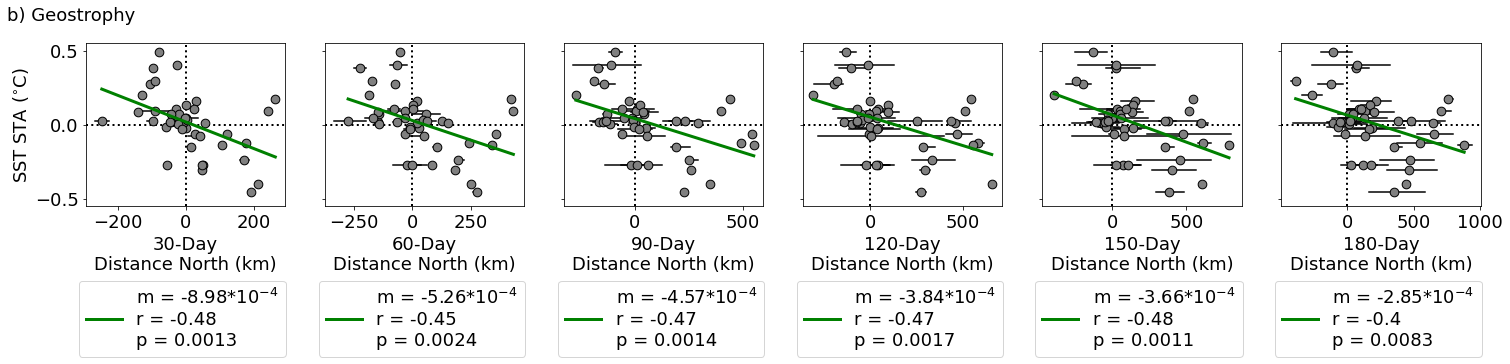

In [12]:
fig,ax = plt.subplots(1,6,figsize=(25,3))

days_to_plot = [30,60,90,120,150,180]

for i in range(6):
    plt_env_versus_distance_north(days_to_plot[i],'gray',ax[i],'cmems')
    ax[i].set_xlabel('%s-Day\nDistance North (km)'%(days_to_plot[i]))
    ax[i].set_ylim([-0.55,0.55])
    if i != 0:
        ax[i].set_yticklabels([])
    
ax[0].set_ylabel('SST STA ($^{\circ}$C)')
ax[0].text(-525,0.7,'b) Geostrophy')
#plt.savefig(euk_paper_dir + 'figs/supp/prelim/temp_STA_vs_dist_north_cmems_v2.pdf',dpi=350, bbox_inches='tight', format='pdf')

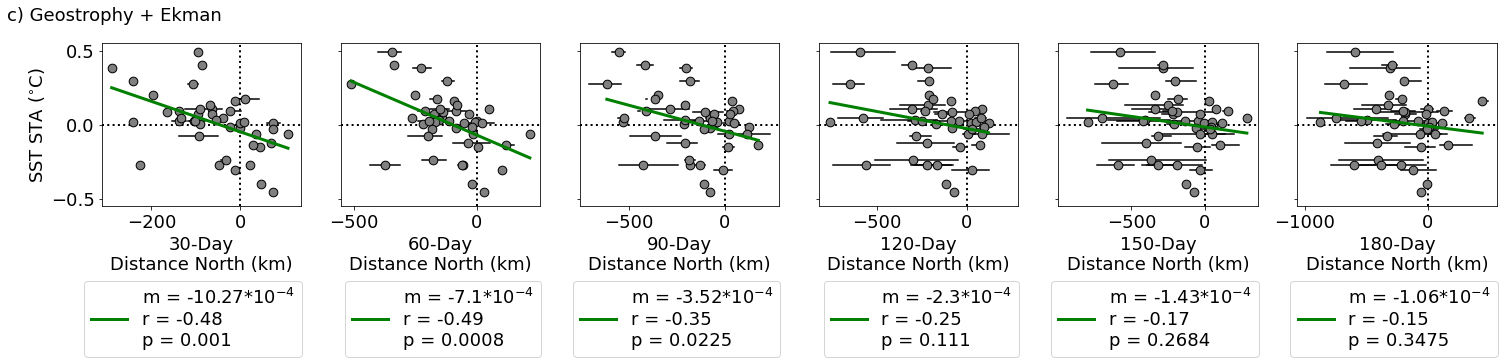

In [13]:
fig,ax = plt.subplots(1,6,figsize=(25,3))

days_to_plot = [30,60,90,120,150,180]

for i in range(6):
    plt_env_versus_distance_north(days_to_plot[i],'gray',ax[i],'oscar')
    ax[i].set_xlabel('%s-Day\nDistance North (km)'%(days_to_plot[i]))
    ax[i].set_ylim([-0.55,0.55])
    if i != 0:
        ax[i].set_yticklabels([])
        
ax[0].set_ylabel('SST STA ($^{\circ}$C)')
ax[0].text(-525,0.7,'c) Geostrophy + Ekman')
#plt.savefig(euk_paper_dir + 'figs/supp/prelim/temp_STA_vs_dist_north_oscar_v2.pdf',dpi=350, bbox_inches='tight', format='pdf')

In [14]:
def rolling_mean_looping_weighted(array, x_values, window, center=True):
    """
    Compute a weighted rolling mean with periodic boundary conditions (looping at the ends),
    weighting by the distance between x-values.

    Parameters:
    - array: array to apply the rolling mean on
    - x_values: pandas Series or array-like, x-values associated with the rows of df
    - window: int, number of rows to consider in the rolling window
    - center: bool, whether the window is centered on the current data point

    Returns:
    - array with the weighted rolling mean applied
    """
    
    new_array = []
    for i in range(len(array)):
        # Determine indices for the rolling window with wrapping
        if center:
            indices = [(i + j - window // 2) % len(array) for j in range(window)]
        else:
            indices = [(i + j - window + 1) % len(array) for j in range(window)]

        # Extract data and corresponding x-values for the rolling window
        data_slice = np.array(array)[indices]
        x_slice = np.array(x_values)[indices]
        x_current = np.array(x_values)[i]

        # Calculate distances
        distances = np.abs(x_slice - x_current)

        # Normalize distances to range [0, 1]
        max_distance = distances.max()
        normalized_distances = distances / max_distance if max_distance > 0 else distances

        # Use exponential decay for weights
        weights = np.exp(-normalized_distances)
        weights /= weights.sum()  # Normalize weights

        # Compute the weighted mean
        rolling_mean = np.sum(data_slice * weights)
        new_array.append(rolling_mean)

    return new_array

In [15]:
metadata_sorted_df = metadata_df.sort_values(by='time_since_sunrise')
metadata_sorted_df['sst_temp_rolling_mean'] = rolling_mean_looping_weighted(metadata_sorted_df['sst_lat_norm_anom'],metadata_sorted_df['time_to_sunrise'], 7)

Text(-8, 0.6, 'd)')

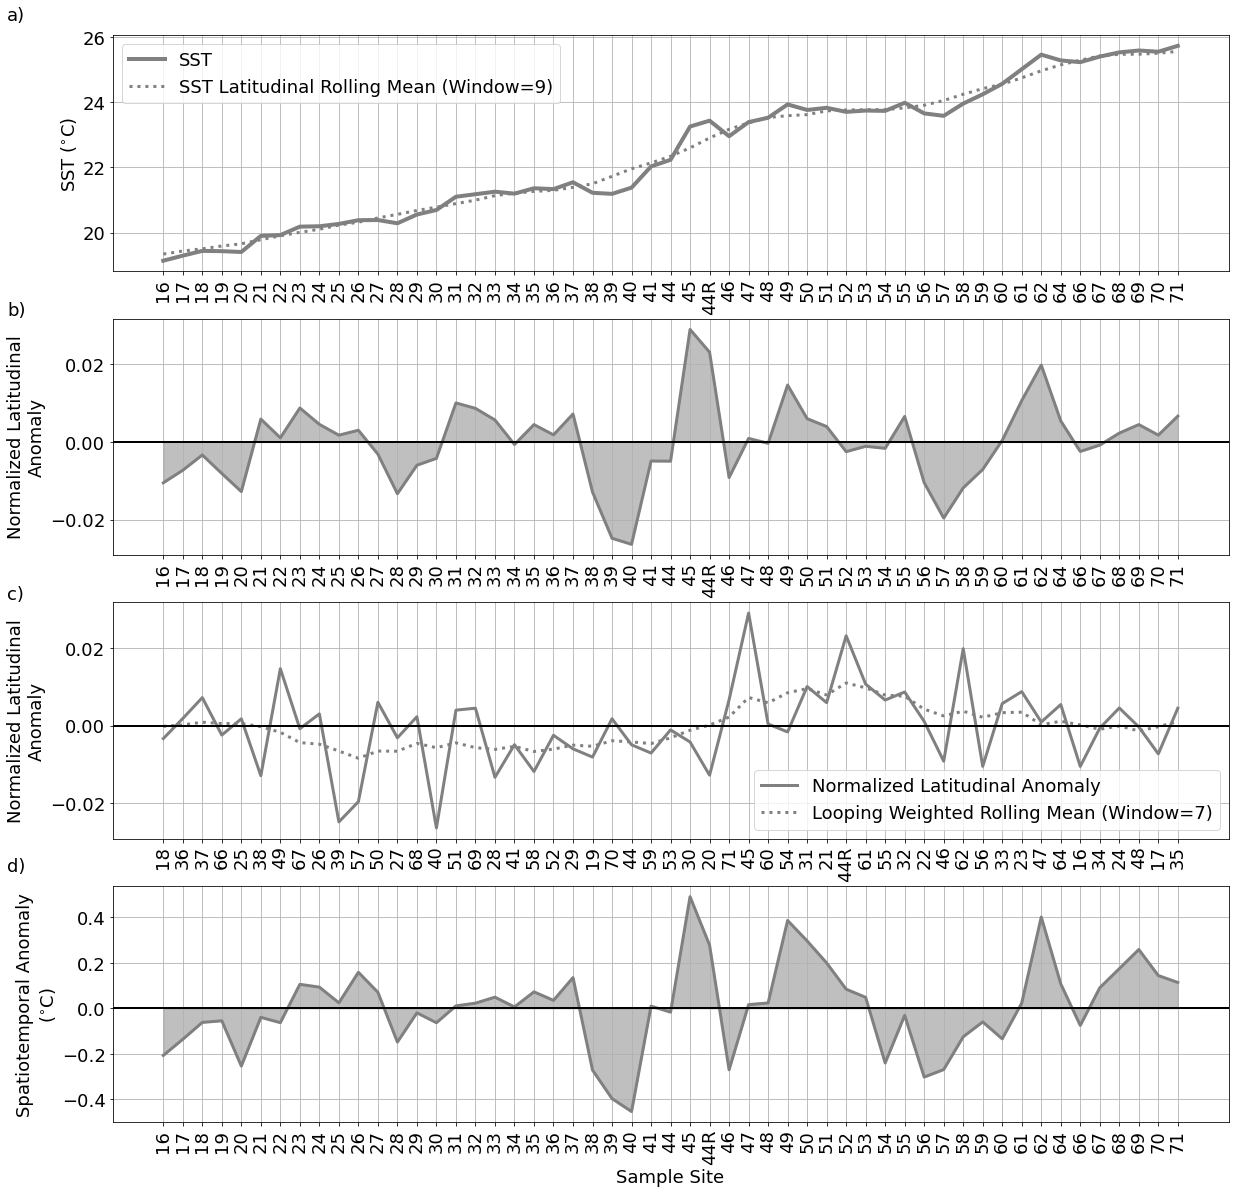

In [14]:
panels = 4
fig,ax = plt.subplots(panels,1,figsize=(20,panels*5))

linewidth = 3
scat_size = 75

########## Absolute abundance ##########
ax[0].plot(metadata_df['sst'],c='gray',linewidth=linewidth+1,label='SST')
ax[0].plot(metadata_df['sst_lat_rolling_mean'],c='gray',linestyle=':',linewidth=linewidth,label='SST Latitudinal Rolling Mean (Window=9)')
ax[0].tick_params(axis ='x',rotation=90)
ax[0].set_ylabel('SST ($^{\circ}$C)')
ax[0].legend()

########## Normalized Latitudinal Anomaly ##########
ax[1].plot(metadata_df['sst_lat_norm_anom'],linewidth=linewidth,color='gray')
ax[1].fill_between(metadata_df.index,0,metadata_df['sst_lat_norm_anom'],alpha=0.5,color='gray')
ax[1].tick_params(axis ='x',rotation=90)
ax[1].set_xlabel('Sample Site')
ax[1].set_ylabel('Normalized Latitudinal\nAnomaly')

########## Normalized Latitudinal Anomaly Temporally Sorted ##########
ax[2].plot(metadata_sorted_df['sst_lat_norm_anom'],label='Normalized Latitudinal Anomaly',
           linewidth=linewidth,color='gray')
ax[2].plot(metadata_sorted_df['sst_temp_rolling_mean'],label='Looping Weighted Rolling Mean (Window=7)',
           linewidth=linewidth,linestyle=':',color='gray')
ax[2].tick_params(axis ='x',rotation=90)
ax[2].set_ylabel('Normalized Latitudinal\nAnomaly')
ax[2].legend()

########## Spatiotemporal Anomaly ##########
ax[3].plot(metadata_df['sst_spatiotemp_anom'],linewidth=linewidth,color='gray')
ax[3].fill_between(metadata_df.index,0,metadata_df['sst_spatiotemp_anom'],alpha=0.5,color='gray')
ax[3].tick_params(axis ='x',rotation=90)
ax[3].set_xlabel('Sample Site')
ax[3].set_ylabel('Spatiotemporal Anomaly\n($^{\circ}$C)')

for i in range(panels):
    ax[i].grid(zorder=0)
    if i != 0:
        ax[i].axhline(0,c='k',linewidth=2,zorder=2)
    
xpos = -8
ax[0].text(xpos,26.5,'a)')
ax[1].text(xpos,0.0325,'b)')
ax[2].text(xpos,0.0325,'c)')
ax[3].text(xpos,0.6,'d)')

#plt.savefig(euk_paper_dir + 'figs/supp/prelim/STA_steps_temperature.pdf',dpi=350, bbox_inches='tight', format='pdf')
#plt.show()

Text(14, 26.5, 'a)')

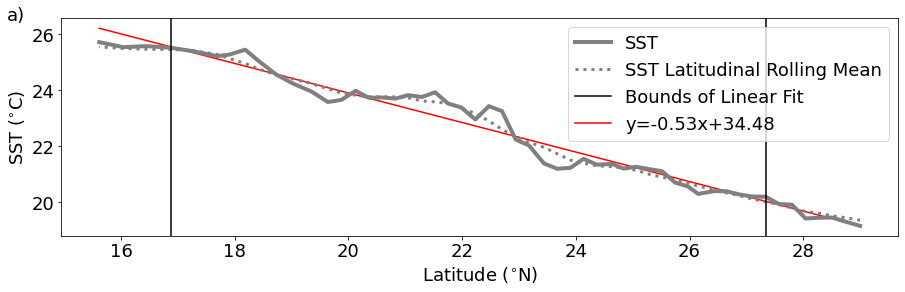

In [15]:
fig,ax = plt.subplots(1,1,figsize=(15,4))

######################## Prochlorococcus ########################

linewidth=3
ax.set_xlabel('Sample Site')

######################## SST ########################

ax.set_xlabel('Latitude ($^{\circ}$N)')

ax.plot(metadata_df['latitude'],metadata_df['sst'],c='gray',linewidth=linewidth+1,label='SST')
ax.plot(metadata_df['latitude'],metadata_df['sst_lat_rolling_mean'],c='gray',linestyle=':',linewidth=linewidth,label='SST Latitudinal Rolling Mean')

best_sst_window, other_sst_windows = env_linear_window_search(metadata_df['sst_lat_rolling_mean'])
start_ind, window_size, slope, intercept, _ = best_sst_window
lin_inds = np.arange(int(float(start_ind)),int(float(start_ind))+int(float(window_size)))

ax.axvline(metadata_df['latitude'][lin_inds[0]],c='k',label='Bounds of Linear Fit')
ax.axvline(metadata_df['latitude'][lin_inds[-1]],c='k')


x = list(metadata_df.latitude)
y = np.multiply(slope,x)+intercept
ax.plot(x,y,c='r',label='y=%sx+%s'%(round(slope,2),round(intercept,2)),zorder=0)

#ax.plot(metadata_df['latitude'][lin_inds],metadata_df['sst_lat_rolling_mean'][lin_inds],c='k',linestyle=':',linewidth=linewidth)
ax.set_ylabel('SST ($^{\circ}$C)')
ax.legend()

ax.text(14,26.5,'a)')

#plt.savefig(euk_paper_dir + 'figs/supp/prelim/transect_SST.pdf',dpi=350, bbox_inches='tight', format='pdf')